<a href="https://colab.research.google.com/github/rohailkhan/Marketing_analytics/blob/main/7_Identifying_Drivers_of_Outcomes_Linear_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7 **Amusement park data Analysis**
## **Using Linear Model**
Linear model will be used for this data analysis.
**Application of Linear Model**
Linear models relate to continuous scale outcome variables to predictors by finding a straight line that best fits the points

# **Steps for Linear Modelling**




**Step 1.   Data Quality checking :**

. 

*   Its better to have **approximate Normal Distributions** .This can be checked by **Hist plots**
*   Also varaibles like count , Bool need to be changed.
*   **Excessive correlation** between variables should be avoided . If corr>0.8 or >0.9 exists,this shows that the items are **nearly identical**
*   standardize data to be on a uniform scale ie.

  X - Xmean/Xstd
*   List item
*   List item

**Step 2.   Linear Model fitting :**
Using statmodels ols library , Linear model object is created and one or more prdictors are checked using fit metod

**Step 4.  Model Summary (R-squared , F-statistics, Residuals etc) :**
We can find these from the model summary.

**R-squared**

Its a measure of how much variation in the dependent variable is captured by the model. In
this case, the R-squared is 0.407, indicating that about 41% of the variation in overall satisfaction is explained by variation
in satisfaction with rides. 

When a model includes only a single predictor, R-squared is equal to the square of the correlation
coefficient r between the predictor and the outcome:

**F-Satatistics**
This test shows whether the model predicts the data better than simply
taking the average of the outcome variable and using that as the single prediction for all the observations.

Or

In essence, this test
tells whether our model is better than a model that predicts overall satisfaction using no predictors at all. 

Note: this is the same test reported by the statsmodels.stats.anova.anova_lm() function  you could find the same value with anova_lm(m1). 

 In the present case, the F-statistic shows a p-value <<.05, so we reject the null hypothesis that
a model without predictors performs as well as model m1.

**Residuals**
The residuals (difference between actual and predicted values) should be symmetric around some point (like 0)
We can find the symmetry by plotting their **histogram** eg plt.hist(ml.resid)
 or taking the percentiles range as:

 np.percentile(ml.resid, q=range(0,120,25) 

**Step 3.  Checking Model fit (is the model reasonable?) :**

A linear model assumes that the relationship between predictors and an outcome is linear and that errors in fit are
symmetric with similar variability across their range (a property known as **homoskedasticity**). Results may be misleading
when these assumptions do not match the data. Diagnostic goodness of fit plots of a model can help you assess whether
these assumptions are reasonable for your data

**Step 1.   Data Quality checking :**
  




2.   List item
1.   List item
2.   List item
1.   List item
2.   List item
1.   List item
2.   List item
1.   List item
2.   List item






In [1]:
%config InlineBackend.figure_format = 'svg'
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 70)

### Load data

### Amusement Park Data

In [2]:
import pandas as pd
sat_df = pd.read_csv('http://bit.ly/PMR-ch7')
sat_df.head()

,is_weekend,num_child,distance,rides,games,wait,clean,overall
0,True,0,9.844503,82.0,64.0,82.0,88.0,68.0
1,False,1,2.720221,85.0,83.0,100.0,90.0,100.0
2,False,3,1.878189,88.0,81.0,80.0,91.0,95.0
3,False,0,14.211682,73.0,52.0,68.0,74.0,55.0
4,False,1,9.362776,78.0,93.0,56.0,82.0,63.0


In [3]:
import numpy as np
import pandas as pd
np.random.seed(8266)
n_resp = 500 # Number of survey responses

## Fitting linear models with lm()

In [4]:
sat_df.describe().round(2)

,num_child,distance,rides,games,wait,clean,overall
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,1.75,31.58,80.18,73.96,73.32,85.25,75.34
std,1.53,35.77,6.02,8.74,10.70,5.73,12.16
min,0.00,0.64,64.00,44.00,46.00,65.00,42.00
25%,0.00,9.07,76.00,68.00,66.00,82.00,67.00
50%,2.00,19.26,80.00,74.00,73.00,85.00,76.00
75%,3.00,39.01,84.00,80.00,80.00,89.00,85.00
max,5.00,233.30,99.00,100.00,100.00,100.00,100.00


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
import seaborn as sns
sns.set_context('paper')
import matplotlib.pyplot as plt
g = sns.PairGrid(sat_df.replace({False: 0, True: 1}),
                 height=1.2, aspect=1.0)
g.map_upper(sns.scatterplot, linewidths=1, edgecolor="w", s=10,
            alpha=0.5)
g.map_diag(plt.hist)
g.map_lower(sns.kdeplot)
plt.show()

Looking the diagonal historgrams we see that **Distance** is not normally distributed but **highly skewed** so we can remove this skew by taking its log and adding a new column to the data

In [7]:
sat_df['log_dist'] = sat_df.distance.apply(np.log)

Text(0, 0.5, 'Count')

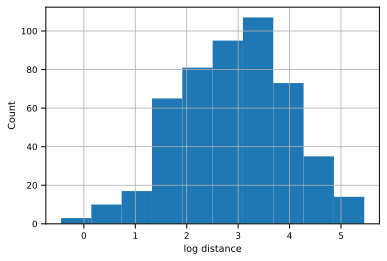

In [8]:
sat_df.log_dist.hist()
plt.xlabel('log distance')
plt.ylabel('Count')

In [9]:
sat_df.corr()

,is_weekend,num_child,distance,rides,games,wait,clean,overall,log_dist
is_weekend,1.000000,0.035537,0.057859,0.057817,-0.022099,0.027265,0.036172,0.012385,0.044948
num_child,0.035537,1.000000,0.009624,-0.027300,0.048249,0.014658,0.016123,0.337012,-0.043294
distance,0.057859,0.009624,1.000000,0.054943,0.037450,0.013249,0.024323,0.153014,0.827848
rides,0.057817,-0.027300,0.054943,1.000000,0.530970,0.356009,0.806247,0.637674,0.014385
games,-0.022099,0.048249,0.037450,0.530970,1.000000,0.290641,0.544000,0.502826,0.048214
wait,0.027265,0.014658,0.013249,0.356009,0.290641,1.000000,0.427469,0.576697,0.003471
clean,0.036172,0.016123,0.024323,0.806247,0.544000,0.427469,1.000000,0.679433,-0.004446
overall,0.012385,0.337012,0.153014,0.637674,0.502826,0.576697,0.679433,1.000000,0.099192
log_dist,0.044948,-0.043294,0.827848,0.014385,0.048214,0.003471,-0.004446,0.099192,1.000000


### Correlation plot
 Inspection of the item associations is always recommended before linear modeling,
in order to check for extremely high correlations between items **(such as r > 0.9)**. 

In the present data, rides and clean are highly related
**(r = 0.81)** but not so strongly that remediation is strictly required

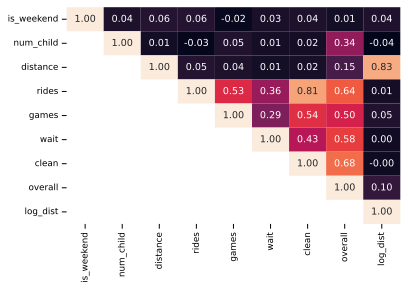

In [10]:
sat_df_corr = sat_df.corr()
sns.heatmap(sat_df_corr, annot=True, fmt=".2f",
            mask=np.tri(sat_df_corr.shape[0], k=-1, dtype=bool),
            cbar=False)

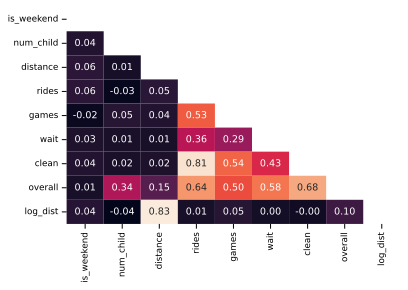

In [11]:
sat_df_corr = sat_df.corr()
sns.heatmap(sat_df_corr, annot=True, fmt=".2f",
            mask=~np.tri(sat_df_corr.shape[0], k=-1, dtype=bool),
            cbar=False)

### **Q-1 Find Over All Satisfaction vs rides**

Text(0, 0.5, 'Satisfaction overall')

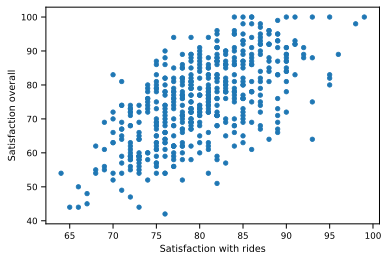

In [12]:
sat_df.plot(kind='scatter', x='rides', y='overall')
plt.xlabel('Satisfaction with rides')
plt.ylabel('Satisfaction overall')

### Linear model for **Over All Satisfaction vs rides**
Using single predictor

In [13]:
# using scikit learn 
from sklearn.linear_model import LinearRegression
X=np.array(sat_df['overall']).reshape(-1, 1)
Y=np.array(sat_df['rides']).reshape(-1, 1)
reg = LinearRegression().fit(X, Y)
reg.score(X, Y) , reg.coef_ , reg.intercept_

(0.4066280681606048, array([[0.3155351]]), array([56.40621657]))

In [14]:
# using OLS library from statmodels.formula.api
import statsmodels.formula.api as smf
OLS=smf.ols(formula='overall ~ rides', data=sat_df).fit()


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Linear Model Summary**

In [15]:
print(OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                overall   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     341.3
Date:                Tue, 19 Oct 2021   Prob (F-statistic):           2.02e-58
Time:                        05:06:45   Log-Likelihood:                -1827.7
No. Observations:                 500   AIC:                             3659.
Df Residuals:                     498   BIC:                             3668.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -27.9869      5.609     -4.990      0.0

#### **1- R-squared**, a measure of how much variation in the dependent variable is captured by the model. 
In this case, the R-squared is **0.407**, indicating that about **41%** of the variation in overall satisfaction is explained by variation
in satisfaction with rides.

Note: When a model includes only a single predictor, R-squared is equal to the square of the correlation
coefficient r between the predictor and the outcome

#### **2- F-statistic**
In essence, this test
tells whether our model is better than a model that predicts (overall satisfaction) using no predictors at all.
OR

F-statistic shows whether the model predicts the data better than simply
taking the **average of the outcome variable** and using that as the **single prediction** for all the observations.

In the present case, the F-statistic shows a p-value <<.05, so we reject the null hypothesis that
a model without predictors performs as well as model m1.

#### **3 - The Linear Model predictions** 
The Linear Model formula is **Y = mX + C**
 For **overall-vs-rides** We have intercept C=-27.989
 Y = Over All ratings (prediction or outcome)
 
 X = Rides (feature)
 If X=95 , then a consumer will give 94.439 over all ratings because:
 
  Y= -27.9869 + 1.2887*95= 94.439

 We can show this using the predict method

In [16]:
OLS.predict({'rides' : [95]})

0    94.439017
dtype: float64

#### **4 - The Residuals**
The difference between the Actual and predicted values 

In [17]:
lm=OLS
lm.resid.min() , lm.resid.max() , lm.resid.mean()

(-27.953838097780633, 22.75746829230569, 9.464429240324535e-15)

The range is quite wide, ranging from −27.954 to 22.757, which means our predictions can be rather off for any given data
point (more than 27 points on the rating scale). 

The quartiles of the residuals suggest that they are fairly symmetric around
0, at least in the interquartile range:

In [18]:
np.percentile(m1.resid, q=range(0,120,25))

NameError: ignored

In [ ]:
plt.hist(m1.resid)
plt.xlabel('m1 residual value')
plt.ylabel('Count')

In [ ]:
# that is a good sign that the model is unbiased (although perhaps imprecise).
# We can also look at the standard deviation of the residuals
np.std(m1.resid)

### ols objects

In [ ]:
m1 = smf.ols('overall ~ rides', data=sat_df).fit()

In [ ]:
# This plot and the one below it are identical
sat_df.plot(kind='scatter', x='rides', y='overall')
plt.plot(sat_df.rides, m1.predict(sat_df.rides))

In [ ]:
from statsmodels.graphics import regressionplots
sat_df.plot(kind='scatter', x='rides', y='overall')
ax = plt.gca()
_ = regressionplots.abline_plot(model_results=m1, ax=ax)

## 7.2.5 Checking Model Fit

In [ ]:
np.random.seed(8266)
x = np.random.normal(size=500)
y = x**2 + np.random.normal(size=500)
toy_model = smf.ols('y ~ x', data={'x': x, 'y': y}).fit()
toy_model.summary()

In [ ]:
plt.scatter(x,y)
plt.plot(x, toy_model.predict({'x': x}))
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y with fit line')

In [ ]:
plt.scatter(x=toy_model.fittedvalues, y=toy_model.resid)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Predicted y values vs Residuals')

In [ ]:
from statsmodels.graphics import gofplots
def plot_gof_figures(model):
  '''Plot a multipanel figure of goodness of fit plots'''
  sns.residplot(model.fittedvalues, model.resid, lowess=True)
  plt.xlabel('Fitted values')
  plt.ylabel('Residuals')
  plt.title('Residuals vs Fitted')
  plt.show()

  _ = gofplots.qqplot(model.resid, fit=True, line='45')
  plt.title('Normal Q-Q')
  plt.show()

  plt.scatter(model.fittedvalues, np.abs(model.resid)**.5)
  plt.xlabel('Fitted values')
  plt.ylabel('Square root of the standardized residuals')
  plt.title('Scale-Location')
  plt.show()

  regressionplots.plot_leverage_resid2(model)

In [ ]:
plot_gof_figures(toy_model)

In [ ]:
plot_gof_figures(m1)

In [ ]:
sat_df.loc[[ 405, 48, 176]]

## 7.3 Fitting Linear Models with Multiple Predictors

In [ ]:
m2 = smf.ols('overall ~ rides + games + wait + clean',
             data=sat_df).fit()
m2.summary()

**The residual standard error is now 7.732, whereas it was 9.360 for the simpler model, meaning that the predictions are more
accurate. bold text**

In [ ]:
np.std(m2.resid)

Text(0, 0.5, 'Count')

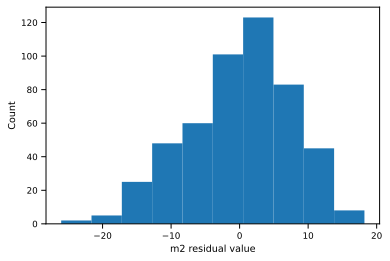

In [80]:
plt.hist(m2.resid)
plt.xlabel('m2 residual value')
plt.ylabel('Count')

In [79]:
np.percentile(m2.resid, q=range(0,101,25))

array([-26.0408112 ,  -4.89848961,   0.88100141,   5.56376647,
        18.2162639 ])

In [73]:
!pip install python_marketing_research
from python_marketing_research_functions import chapter6

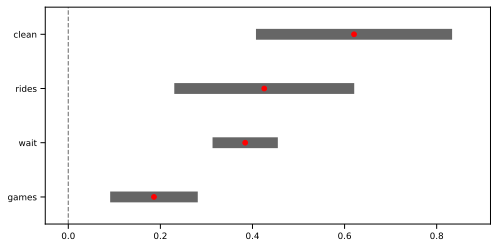

In [74]:
chapter6.plot_confidence_intervals(m2.params[1:],
                                   m2.conf_int().iloc[1:,:],
                                   zero_line=True)

### 7.3.1 Comparing Models

In [75]:
print(m1.rsquared)
print(m2.rsquared)

0.4066280681606046
0.5950752098970709


In [76]:
print(m1.rsquared_adj)
print(m2.rsquared_adj)

0.4054365582573126
0.5918030903810876


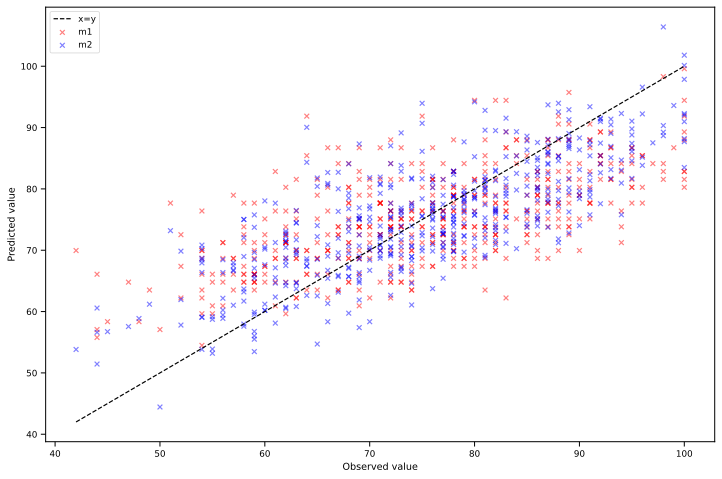

In [77]:
plt.figure(figsize=(12,8))
plt.scatter(sat_df.overall, m1.fittedvalues, c='r', marker='x',
            alpha=0.5, label='m1')
plt.scatter(sat_df.overall, m2.fittedvalues, c='b', marker='x',
            alpha=0.5, label='m2')
satisfaction_range = [sat_df.overall.min(), sat_df.overall.max()]

plt.plot(satisfaction_range, satisfaction_range, '--k', label = 'x=y')
plt.xlabel('Observed value')
plt.ylabel('Predicted value')
plt.legend()

In [78]:
from statsmodels.stats import anova as sms_anova
sms_anova.anova_lm(m1,m2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,498.0,43808.577336,0.0,NaN,NaN,NaN
1,495.0,29895.547852,3.0,13913.029484,76.789021,8.500020e-41


### 7.3.2 Using a Model to Make Predictions

In [ ]:
m2.params.Intercept + m2.params.rides*100 + m2.params.games*100\
  + m2.params.wait*100 + m2.params.clean*100

In [ ]:
m2.params.Intercept + (m2.params[1:].sum() * 100)

In [ ]:
m2.predict(sat_df.head(10))

In [ ]:
m2.fittedvalues[:10]

In [ ]:
m2.predict({'rides': 100,
            'games': 100,
            'wait': 100,
            'clean': 100})

### 7.3.3 Standardizing the Predictors

In [ ]:
((sat_df.rides - sat_df.rides.mean())/sat_df.rides.std()).head(10)

In [ ]:
sat_df.head()

In [ ]:
sat_df_scaled = sat_df.copy()
idx = ['clean', 'games', 'rides', 'wait', 'log_dist', 'overall']
sat_df_scaled[idx] = (sat_df[idx] - sat_df[idx].mean(axis=0))\
  /sat_df[idx].std(axis=0)

In [ ]:
sat_df_scaled.head()

In [ ]:
sat_df_scaled[idx].describe().round(2)

## 7.4 Using Factors as Predictors

In [ ]:
m3 = smf.ols('overall ~ rides + games + wait + clean + is_weekend'
             ' + log_dist + num_child', data=sat_df_scaled).fit()
m3.summary()

In [ ]:
dummy_vals = pd.get_dummies(sat_df_scaled.num_child, prefix='num_child')
dummy_vals.head()

In [ ]:
sat_df_child_factor = sat_df_scaled.join(dummy_vals)

In [ ]:
m4 = smf.ols('overall ~ rides + games + wait + clean + log_dist'
             '+ num_child_0 + num_child_1 + num_child_2 + num_child_3'
             '+ num_child_4 + num_child_5',
             data=sat_df_child_factor).fit()
m4.summary()

In [ ]:
sat_df_scaled['has_child'] = sat_df_scaled.num_child.apply(lambda x:
                                                           x > 0)
m5 = smf.ols('overall ~ rides + games + wait + clean + log_dist'
             '+ has_child', data=sat_df_scaled).fit()
m5.summary()

## 7.5 Interaction Terms

In [ ]:
m6 = smf.ols('overall ~ rides + games + wait + clean + log_dist'
             '+ has_child + rides:has_child + games:has_child'
             '+ wait:has_child + clean:has_child + rides:is_weekend'
             '+ games:is_weekend + wait:is_weekend + clean:is_weekend',
             data=sat_df_scaled).fit()
m6.summary()

In [ ]:
m7 = smf.ols('overall ~ rides + games + wait + clean + log_dist'
             '+ has_child + wait:has_child',
             data=sat_df_scaled).fit()
m7.summary()

In [ ]:
chapter6.plot_confidence_intervals(m7.params[1:], m7.conf_int().iloc[1:],
                       zero_line=True)